In [1]:
from google.colab import files
uploaded = files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv
Saving Test (1).xlsx to Test (1).xlsx
Saving Train.xlsx to Train.xlsx


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_excel(r'/content/Train.xlsx')
df_test = pd.read_excel(r'/content/Test (1).xlsx')
df_submit = pd.read_csv(r'/content/SampleSubmission.csv')


In [5]:
df_train

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0000,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0000,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0000,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0000,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0000,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,Apcnt_999968,3740.0,0.01730,0.0000,0.0000,0.000,770998.0,9637475.0,4047934.0,11641992.0,19910965.0,NaN,983003.0,25985589.0,48187375,86615907.0,0.0,0.0,0.0,0.0,0.0,31.740,1662.15,0.00,15.810,2815.5,7299.0,4866.0,60772.0,15969.0,1034.0,NaN,864.0,21.6666,0.0,0.0,4.0,8.0,8.0,0.0,NaN,NaN,0.000000,9.09,0.730040,NaN,0.0,lending,591.048913,0.000000,0.241598,no
55996,Apcnt_999972,3360.0,2.01145,0.6252,0.0000,0.000,NaN,927765.0,NaN,NaN,1849306.0,571052.0,NaN,0.0,16576457,NaN,NaN,NaN,0.0,0.0,1.0,NaN,13350.00,NaN,NaN,1840.5,5475.0,3650.0,60.0,11589.0,1642.0,11589.0,242.0,14.6666,0.0,NaN,28.0,0.0,34.0,0.0,158.0250,136.5135,0.297913,30.30,0.498208,NaN,0.0,lending,NaN,0.000000,NaN,yes
55997,Apcnt_999980,3500.0,0.76640,0.0000,0.0000,0.000,118645.0,3662435.0,3662435.0,3585024.0,704090.0,NaN,2765401.0,4226874.0,21973443,87508273.0,0.0,0.0,0.0,2.0,2.0,119.565,2206.95,12690.00,119.565,1059.0,3924.0,2616.0,2980.0,12135.0,NaN,NaN,232.0,22.3334,0.0,0.0,6.0,0.0,4.0,0.0,NaN,NaN,0.550000,3.03,0.450512,0.0,0.0,lending,1252.474467,2.000000,0.163153,no
55998,Apcnt_999988,3280.0,0.05235,2.0916,2.2212,0.000,NaN,3458599.0,NaN,115533.0,3458599.0,508812.0,NaN,0.0,38549900,20238892.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2373.0,NaN,NaN,60.0,25641.0,852.0,NaN,104.0,57.5000,1.0,NaN,10.0,2.0,8.0,1.0,NaN,150.0000,0.942854,0.00,0.705048,1.0,0.0,charge,NaN,0.000000,0.002997,no


In [7]:
df_test

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0000,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0000,0.0,9858816.0,49014.0,1510098.0,18308285.0,622789.0,1025793.0,1396510.0,34694910,87479487.0,1.0,1.0,1.0,2,2.0,142.560,NaN,NaN,570.585,3082.5,10221.0,6814.0,60.0,11955.0,3528.0,NaN,1216.0,19.5000,3.0,NaN,30.0,18.0,14.0,2.0,NaN,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,118256.0,NaN,NaN,21973443,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.0,4836.0,NaN,NaN,NaN,7.8334,0.0,NaN,2.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0000,0.0,473802.0,473802.0,1724437.0,493641.0,1391064.0,1176725.0,1220293.0,16576457,NaN,2.0,2.0,2.0,3,3.0,109.005,13050.000,NaN,109.005,1414.5,4197.0,2798.0,60.0,14964.0,NaN,NaN,248.0,9.0000,1.0,1.0,36.0,0.0,26.0,0.0,NaN,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0000,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,271133.0,613064.0,4779643.0,48187375,72049802.0,0.0,0.0,0.0,3,3.0,139.065,469.290,469.290,15.180,2724.0,9855.0,6570.0,182.0,11679.0,5900.0,NaN,2388.0,16.6666,1.0,0.0,24.0,28.0,20.0,0.0,NaN,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Apcnt_999940,3258.0,0.37925,0.5698,5.1282,0.0000,NaN,2280318.0,NaN,NaN,2280318.0,1743887.0,NaN,0.0,21973443,126128971.0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,547.5,NaN,NaN,304.0,3741.0,2068.0,NaN,24.0,0.3334,0.0,0.0,6.0,0.0,6.0,0.0,NaN,92.6910,1.100000,0.00,0.800000,NaN,1.0,charge,NaN,0.000000,NaN
23996,Apcnt_999956,3514.0,0.95260,0.0000,0.0000,0.0000,1494538.0,4773419.0,4773419.0,89718571.0,12999991.0,NaN,48989882.0,97696961.0,96375139,NaN,0.0,0.0,0.0,3,3.0,123.195,11663.055,NaN,123.195,1485.0,6387.0,4258.0,60772.0,14691.0,3286.0,NaN,586.0,14.1666,0.0,0.0,10.0,2.0,8.0,0.0,NaN,125.0220,0.000000,12.12,0.196400,0.0,0.0,charge,4200.072959,3.000000,0.930931
23997,Apcnt_999976,3302.0,0.05755,4.2394,0.0000,25.4376,NaN,49403.0,NaN,NaN,49403.0,215895.0,NaN,0.0,21973443,NaN,NaN,NaN,0.0,0,1.0,NaN,13080.000,NaN,NaN,2304.0,NaN,NaN,60.0,10038.0,NaN,5109.0,202.0,5.3334,0.0,NaN,8.0,4.0,2.0,0.0,NaN,NaN,1.100000,1.01,0.800000,NaN,0.0,charge,NaN,4.855060,NaN
23998,Apcnt_999984,3334.0,0.75670,1.4428,0.0000,0.0000,0.0,2513329.0,37733.0,393668.0,2551062.0,121757.0,355935.0,673748.0,16576457,NaN,1.0,2.0,2.0,2,2.0,129.435,13024.995,13024.995,138.450,706.5,2463.0,1642.0,0.0,6297.0,2312.0,NaN,62.0,2.6666,0.0,0.0,12.0,0.0,4.0,0.0,NaN,31.1955,0.440000,2.02,0.519776,NaN,0.0,charge,27.325129,0.818733,0.023749


In [9]:
#Dropping irrelevant columns
df_train.drop('Applicant_ID',1,inplace=True)
df_test.drop('Applicant_ID',1,inplace=True)

In [10]:
#Filling missing values
for i in df_train.columns:
    df_train[i].fillna(-9999,inplace=True)
for i in df_test.columns:
    df_test[i].fillna(-9999,inplace=True)

In [11]:
#Encoding the categorical variable to numeric variable using label encoding
k={'charge':0,'lending':1}
df_train['form_field47']=df_train['form_field47'].map(k)
kt={'charge':0,'lending':1}
df_test['form_field47']=df_test['form_field47'].map(kt)

p ={'no':0,'yes':1}
df_train['default_status']=df_train['default_status'].map(p)

In [26]:
#Visualizing the correlation heatmap
p1=df_train.iloc[:,1:16]

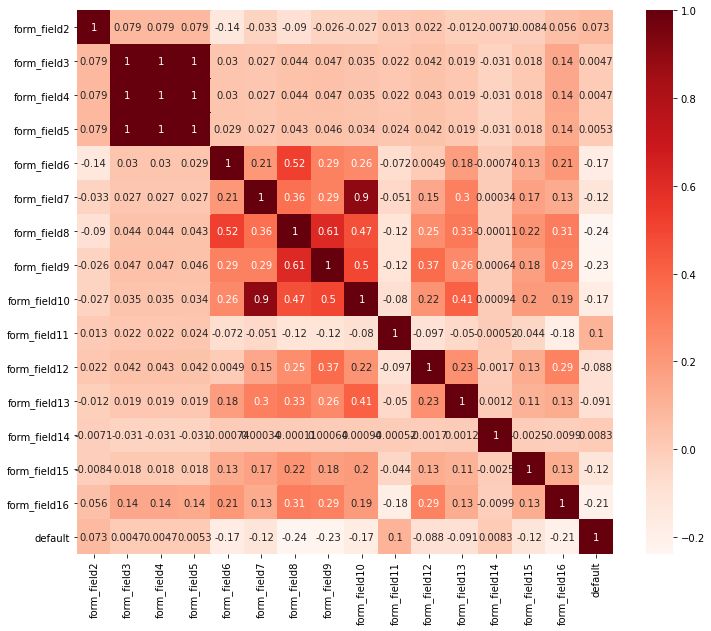

In [28]:
p1=df_train.iloc[:,1:16]
p1['default'] = df_train['default_status']
plt.figure(figsize=(12,10))
cor=p1.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

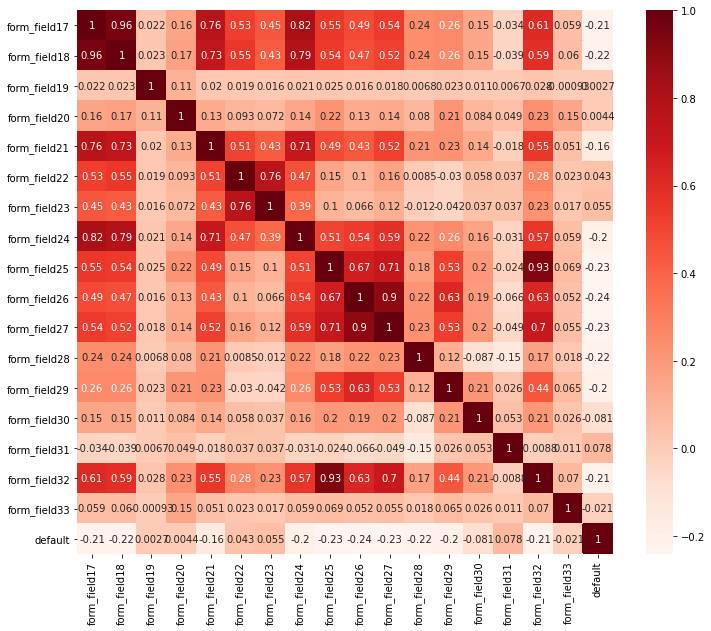

In [29]:
p2=df_train.iloc[:,16:33]
p2['default'] = df_train['default_status']
plt.figure(figsize=(12,10))
cor=p2.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

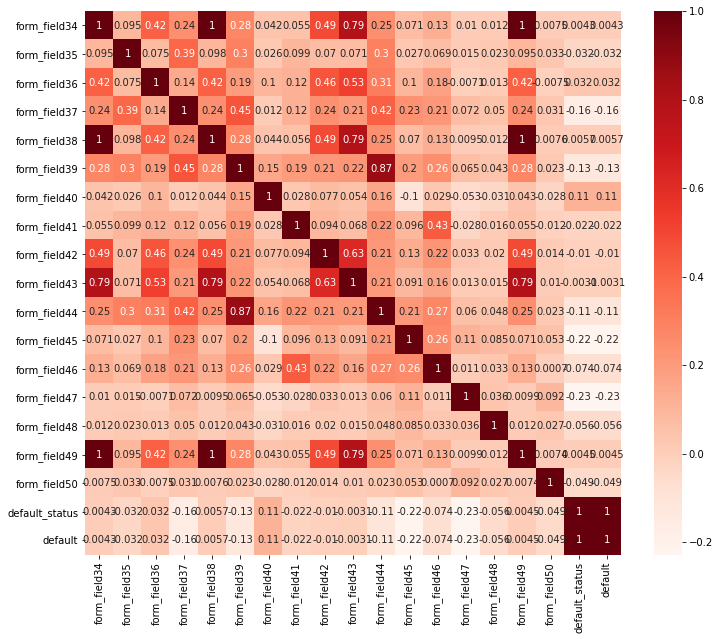

In [30]:
p3=df_train.iloc[:,33:]
p3['default'] = df_train['default_status']
plt.figure(figsize=(12,10))
cor=p3.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [31]:
#The correlation heatmaps above shows that there's no much correlation between the features and the target
# I had to visualize the correlation heatmap by dividing the data into three parts to make it easier to see

In [37]:
y = df_train['default_status'].values
df_train.drop('default_status',1,inplace= True)

In [40]:
x=np.array(df_train)
x_test=np.array(df_test)

In [33]:
!pip install catboost

     |████████████████████████████████| 66.3MB 59kB/s 


In [35]:
from catboost import CatBoostClassifier

In [36]:
model=CatBoostClassifier(iterations=4000, learning_rate=0.008,
                         custom_loss=['AUC', 'Accuracy'])

In [41]:
model.fit(x,y)

0:	learn: 0.6878838	total: 92.9ms	remaining: 6m 11s
1:	learn: 0.6828049	total: 133ms	remaining: 4m 26s
2:	learn: 0.6777940	total: 177ms	remaining: 3m 55s
3:	learn: 0.6728873	total: 222ms	remaining: 3m 42s
4:	learn: 0.6680994	total: 266ms	remaining: 3m 32s
5:	learn: 0.6635128	total: 316ms	remaining: 3m 30s
6:	learn: 0.6590329	total: 357ms	remaining: 3m 23s
7:	learn: 0.6546992	total: 398ms	remaining: 3m 18s
8:	learn: 0.6502170	total: 441ms	remaining: 3m 15s
9:	learn: 0.6459328	total: 483ms	remaining: 3m 12s
10:	learn: 0.6414756	total: 528ms	remaining: 3m 11s
11:	learn: 0.6373452	total: 570ms	remaining: 3m 9s
12:	learn: 0.6335611	total: 626ms	remaining: 3m 12s
13:	learn: 0.6296291	total: 667ms	remaining: 3m 9s
14:	learn: 0.6261619	total: 708ms	remaining: 3m 8s
15:	learn: 0.6224356	total: 751ms	remaining: 3m 7s
16:	learn: 0.6185213	total: 792ms	remaining: 3m 5s
17:	learn: 0.6149278	total: 835ms	remaining: 3m 4s
18:	learn: 0.6112941	total: 876ms	remaining: 3m 3s
19:	learn: 0.6078185	total: 

In [43]:
y_pred=model.predict_proba(x_test)[:,1]

In [44]:
df_submit['default_status']=y_pred

In [45]:
df_submit

,Applicant_ID,default_status
0,Apcnt_1000032,0.300851
1,Apcnt_1000048,0.351333
2,Apcnt_1000052,0.397499
3,Apcnt_1000076,0.737010
4,Apcnt_1000080,0.169598
...,...,...
23995,Apcnt_999940,0.700276
23996,Apcnt_999956,0.310048
23997,Apcnt_999976,0.242189
23998,Apcnt_999984,0.496059


In [ ]:
df_submit.to_csv('final_submission.csv',index=False)

In [ ]:
#The model above gave a final prediction of 0.844137520416357